In [27]:
import pandas as pd
import folium
import yellowbrick
import numpy as np
import matplotlib.cm as cm
import matplotlib.colors as colors

## Load Canada geospatial data from csv

In [9]:
canada_df = pd.read_csv('canada_postal_geospatial.csv')

## Create a map of Toronto and its neighborhoods

In [13]:
# create map of New York using latitude and longitude values
map_toronto = folium.Map(location=[43.651070, -79.347015], zoom_start=11)

# add markers to map
for lat, lng, borough, neighborhood in zip(canada_df['Latitude'], canada_df['Longitude'], canada_df['Borough'], canada_df['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

## Cluster Toronto neighborhoods

In [14]:
X = canada_df[['Latitude','Longitude']]

### Analysis of elbow method indicates to use 3 clusters

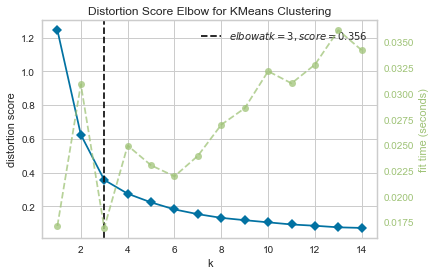

In [17]:
from sklearn.cluster import KMeans

from yellowbrick.cluster import KElbowVisualizer

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,15))

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

In [22]:
n_clusters = 3
model = KMeans(n_clusters=n_clusters)
model = model.fit(X)
labels = model.predict(X)
labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 2, 2, 2, 2, 2, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 0,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

### Add cluster label to data frame

In [21]:
canada_df['cluster_label'] = labels
canada_df.head()

,PostalCode,Borough,Neighborhood,Latitude,Longitude,cluster_label
0,M1B,Scarborough,"Malvern, Rouge",43.806686,-79.194353,0
1,M1C,Scarborough,"Rouge Hill, Port Union, Highland Creek",43.784535,-79.160497,0
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711,0
3,M1G,Scarborough,Woburn,43.770992,-79.216917,0
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476,0


In [31]:
# create map
map_clusters = folium.Map(location=[43.651070, -79.347015], zoom_start=11)

# set color scheme for the clusters
x = np.arange(n_clusters)
ys = [i + x + (i*x)**2 for i in range(n_clusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(canada_df['Latitude'], canada_df['Longitude'], canada_df['Neighborhood'], canada_df['cluster_label']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## Results
As we can see, we divided Toronto into 3 big neighborhoods. I would label them as: west Toronto, central Toronto and East Toronto.